In [55]:
# loading in tensorflow

import tensorflow as tf
import numpy as np

# loading in fashionmnist

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [56]:
# here, we'er verifying the shape of X_train to make sure
# we assigned the values correctly

X_train.shape

(55000, 28, 28)

In [3]:
X_train.dtype

dtype('uint8')

In [4]:
# we're also converting the pixel values from integers to float and scaling them
# from 0 to 1 by dividing by 255 (since 255 is the standard value range for pixel image values)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

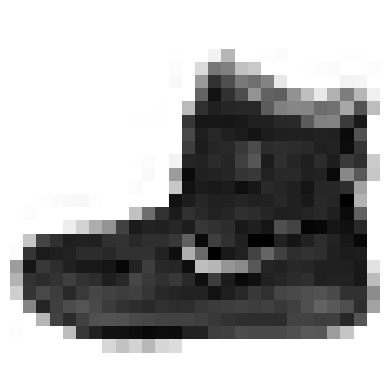

In [58]:
# showing an example of one of the images using matplotlib

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


In [6]:
# the labels will be class IDs rangin from 0 - 9

y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [7]:
# corresponding class names, 9 are below

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# testing this out

class_names[y_train[0]]

'Ankle boot'

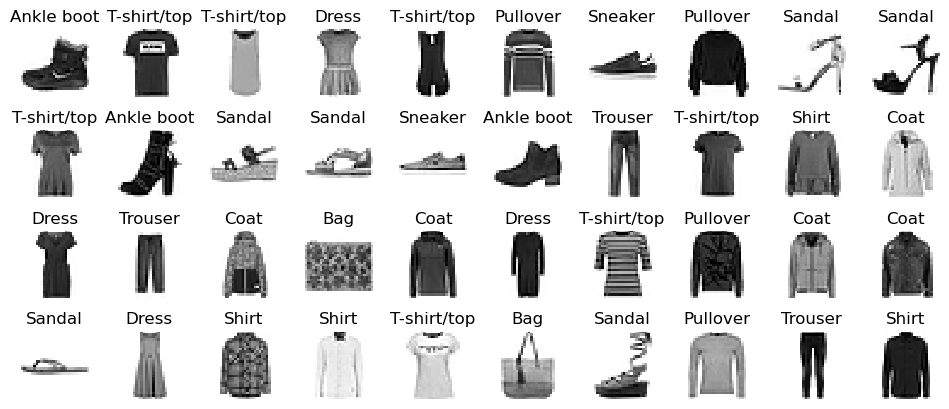

In [9]:
# visualizing some samples from the dataset
# code is copy-pasted from another journal

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

let's build our model using Keras

The first line creates a Sequential model. This is the simplest
kind of Keras model for neural networks that are just composed of
a single stack of layers connected sequentially. This is called the Sequential API.
model = tf.keras.Sequential()

    # Next, we build the first layer and add it to the model. 
    # It is a Flatten layer whose role is to convert each input image into a 1D array: 
    # if it receives input data X, it computes X.reshape(-1, 28*28). 
    # This layer does not have any parameters; it is just there to do 
    # some simple preprocessing. Since it is the first layer in the model, 
    # you should specify the input_shape, which doesn’t include the batch size, 
    # only the shape of the instances. Alternatively, you could add a 
    # keras.layers.InputLayer as the first layer, setting input_shape=[28,28].
    model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
    model.add(tf.keras.layers.Flatten())

or model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

Next we add a Dense hidden layer with 300 neurons. 
It will use the ReLU activation function. 
Each Dense layer manages its own weight matrix, 
containing all the connection weights between the neurons and their inputs. 
It also manages a vector of bias terms (one per neuron). 
When it receives some input data, it computes Equation 10-2.
    tf.keras.layers.Dense(300, activation="relu"),

again, but another layer with 100 neurons
    tf.keras.layers.Dense(100, activation="relu"),

Finally, we add a Dense output layer with 10 neurons (one per class), 
using the softmax activation function (because the classes are exclusive).
    tf.keras.layers.Dense(10, activation="softmax")

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
# viewing a summary of the current model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


see https://keras.io/api/layers/activations/ for the full list of activation functions

In [12]:
# for effeciency, we can just specify the architecture when defining the model

tf.keras.backend.clear_session() # using this function to clear the previous layers we made!
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# note
# code from keras.io will work, but u need to modify the imports and whatnot

# from site
# from keras.layers import Dense

# should be instead

from tensorflow.keras.layers import Dense

In [15]:
# we can fetch a models list of layers

model.layers

In [16]:
# fetching by name

hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
# we can use get_weights() and set_weights() to access and set weights.
# for a dense layer, this will return both weights and biases

weights, biases = hidden1.get_weights()
weights

array([[-0.0711109 ,  0.04102837, -0.00285441, ...,  0.0023735 ,
         0.03412213,  0.04217575],
       [ 0.0548003 ,  0.00390864,  0.06125136, ..., -0.04033765,
        -0.01598972, -0.06338849],
       [ 0.04348768,  0.02813667, -0.00691654, ...,  0.0444556 ,
        -0.07150544,  0.01583201],
       ...,
       [-0.00781393, -0.02901331, -0.01887455, ...,  0.01820138,
         0.05799857, -0.01190893],
       [-0.05048241, -0.01754057, -0.04595016, ..., -0.00701535,
        -0.00914853, -0.05800305],
       [ 0.04526486, -0.04257685, -0.02607298, ...,  0.02143145,
         0.02882501,  0.04324976]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

note that the dense layer's weights are initialize randomly,
but the biases are all zeroes. this is okay.
more on initializers at https://keras.io/api/layers/initializers/

In [21]:
# now we compile the model so we can specify the loss function and optimizer
# do this with model.compile()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

# When using the SGD optimizer, it is important to tune the learning rate.
# So, you will generally want to use optimizer=keras.optimizers.SGD(lr=???)
# to set the learning rate, rather than optimizer="sgd", which defaults to lr=0.01

see https://keras.io/losses, https://keras.io/optimizers, and https://keras.io/metrics.

In [22]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

In [24]:
# training time!
# use fit() to start training

history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 912us/step - loss: 0.7260 - accuracy: 0.7617 - val_loss: 0.5067 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 1s 771us/step - loss: 0.4902 - accuracy: 0.8298 - val_loss: 0.4586 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 1s 781us/step - loss: 0.4437 - accuracy: 0.8442 - val_loss: 0.4242 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 1s 781us/step - loss: 0.4186 - accuracy: 0.8528 - val_loss: 0.3983 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 1s 791us/step - loss: 0.3972 - accuracy: 0.8612 - val_loss: 0.3946 - val_accuracy: 0.8572
Epoch 6/30
1719/1719 [==============================] - 1s 777us/step - loss: 0.3809 - accuracy: 0.8658 - val_loss: 0.3999 - val_accuracy: 0.8568
Epoch 7/30
1719/1719 [==============================] - 1s 783us/step - loss: 0.3682 - accuracy: 0.8691 - val_loss: 0.3732 -

In [25]:
# nice!
# note the outputs and how they change

# the loss is successfully being minimized by a decent amount
# our accuracy is over 90%, with the validation accuracy being not far off
# this is good as it means our model isn't too overfit at the moment

if some classes are being overrepresented, and some are being under represented,
you can use the class_weight() argument in the fit() method to give larger and lower
weights to classes as needed.

In [26]:
# look at training parameters

history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
# list of completed epochs

print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


<Axes: xlabel='Epoch'>

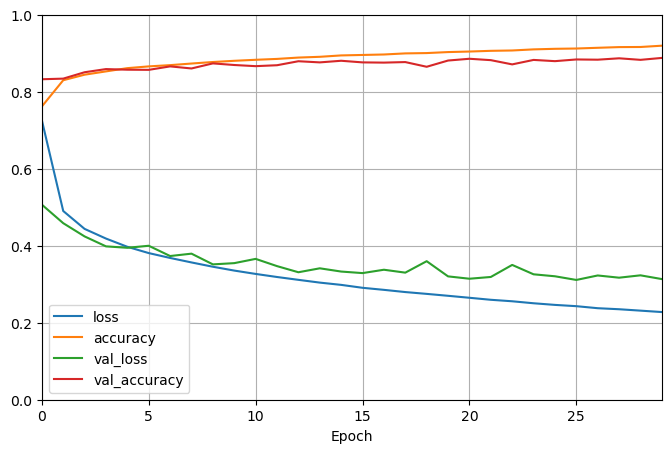

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# here we're using matplotlib and pandas to plot the loss and accuracy
# as the model trains over each epoch
# note: we use the .history() parameter to access this data

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
)

In [36]:
# if we're not satisfied with the results, we can call fit() again and
# the model will pick up right where it left off. very cool.

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 782us/step - loss: 0.2052 - accuracy: 0.9271 - val_loss: 0.3377 - val_accuracy: 0.8802
Epoch 2/10
1719/1719 [==============================] - 1s 766us/step - loss: 0.2026 - accuracy: 0.9270 - val_loss: 0.3195 - val_accuracy: 0.8836
Epoch 3/10
1719/1719 [==============================] - 1s 772us/step - loss: 0.1984 - accuracy: 0.9285 - val_loss: 0.3202 - val_accuracy: 0.8862
Epoch 4/10
1719/1719 [==============================] - 1s 752us/step - loss: 0.1967 - accuracy: 0.9305 - val_loss: 0.3171 - val_accuracy: 0.8856
Epoch 5/10
1719/1719 [==============================] - 1s 756us/step - loss: 0.1928 - accuracy: 0.9300 - val_loss: 0.3092 - val_accuracy: 0.8850
Epoch 6/10
1719/1719 [==============================] - 1s 756us/step - loss: 0.1902 - accuracy: 0.9323 - val_loss: 0.3294 - val_accuracy: 0.8860
Epoch 7/10
1719/1719 [==============================] - 1s 756us/step - loss: 0.1883 - accuracy: 0.9316 - val_loss: 0.3203 -

In [46]:
# next we can use predict() method to make new predictions

# in this case we'll just use the first three instances of the test set
X_new = X_test[:3]  # select first three instances
y_proba = model.predict(X_new)  # predict probabilities
y_proba.round(2)    # easier to deal with rounded input, in this case to 2 decimal places

1/1 [==============================] - 0s 12ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [48]:
# using argmax to return the index of the highest value in each list

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [52]:
# and voila

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [53]:
###